## Part 3: Comparing Manual K2 vs bnstruct

In this section we **compare** the two learned structures on the same datasets (Asia, Child, Ruiz) using:

1. **Structural metrics**  
   - **Structural Hamming Distance** (SHD)  
   - **Edge counts**  
   - **Precision / Recall / F₁** (treating one network as “reference”)

2. **Statistical scores**  
   - **Log‐likelihood**  
   - **BDeu** (marginal likelihood under BD equivalent uniform prior)  
   - **BIC** and **AIC**  

We use the **bnlearn** package to compute all of these.

---

### Libraries & Data

In [71]:
#––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––
# Required packages
#––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––
source("bnstruct_objects.R")


Caricamento pacchetto: 'bnstruct'


Il seguente oggetto `e mascherato da 'package:gRbase':

    dag


I seguenti oggetti sono mascherati da 'package:bnlearn':

    impute, read.bif, read.dsc, read.net, shd, write.dsc


Il seguente oggetto `e mascherato da 'package:tidyr':

    complete


Il seguente oggetto `e mascherato da 'package:Rgraphviz':

    name




PHASE 1: Building Undirected Network...
Calculating Mutual Information...
Building initial network...
PHASE 2: Achieving Complete Connectivity...
Achieving complete connectivity...
PHASE 3: Refining Graph Structure...
Found 0 triangles to refine...
PHASE 4-7: Assigning Orientations...
PHASE 4: Conditional independence tests...
Completing orientations...
Extracting topological order...
PHASE 1: Building Undirected Network...
Calculating Mutual Information...
Building initial network...
PHASE 2: Achieving Complete Connectivity...
Achieving complete connectivity...


Warning message in shortest_paths(g, from = from, to = to):
"At vendor/cigraph/src/paths/unweighted.c:444 : Couldn't reach some vertices."


PHASE 3: Refining Graph Structure...
Found 0 triangles to refine...
PHASE 4-7: Assigning Orientations...
PHASE 4: Conditional independence tests...
Completing orientations...
Extracting topological order...


Rows: 10000 Columns: 11
-- Column specification --------------------------------------------------------
Delimiter: ","
dbl (11): Akt, Erk, Jnk, Mek, P38, PIP2, PIP3, PKA, PKC, Plcg, Raf

i Use `spec()` to retrieve the full column specification for this data.
i Specify the column types or set `show_col_types = FALSE` to quiet this message.


PHASE 1: Building Undirected Network...
Calculating Mutual Information...
Building initial network...
PHASE 2: Achieving Complete Connectivity...
Achieving complete connectivity...


Warning message in shortest_paths(g, from = from, to = to):
"At vendor/cigraph/src/paths/unweighted.c:444 : Couldn't reach some vertices."
Warning message in shortest_paths(g, from = from, to = to):
"At vendor/cigraph/src/paths/unweighted.c:444 : Couldn't reach some vertices."


PHASE 3: Refining Graph Structure...
Found 0 triangles to refine...
PHASE 4-7: Assigning Orientations...
PHASE 4: Conditional independence tests...
Completing orientations...
Extracting topological order...


bnstruct :: performing imputation ...

bnstruct :: imputation finished.



PHASE 1: Building Undirected Network...
Calculating Mutual Information...
Building initial network...
PHASE 2: Achieving Complete Connectivity...
Achieving complete connectivity...


Warning message in shortest_paths(g, from = from, to = to):
"At vendor/cigraph/src/paths/unweighted.c:444 : Couldn't reach some vertices."
Warning message in shortest_paths(g, from = from, to = to):
"At vendor/cigraph/src/paths/unweighted.c:444 : Couldn't reach some vertices."
Warning message in shortest_paths(g, from = from, to = to):
"At vendor/cigraph/src/paths/unweighted.c:444 : Couldn't reach some vertices."


PHASE 3: Refining Graph Structure...
Found 0 triangles to refine...
PHASE 4-7: Assigning Orientations...
PHASE 4: Conditional independence tests...
Completing orientations...
Extracting topological order...


bnstruct :: learning the structure using MMHC ...

bnstruct :: learning using MMHC completed.

bnstruct :: learning network parameters ... 

bnstruct :: parameter learning done.

bnstruct :: learning the structure using MMHC ...

bnstruct :: learning using MMHC completed.

bnstruct :: learning network parameters ... 

bnstruct :: parameter learning done.

bnstruct :: learning the structure using MMHC ...

bnstruct :: learning using MMHC completed.

bnstruct :: learning network parameters ... 

bnstruct :: parameter learning done.

bnstruct :: learning the structure using MMHC ...

bnstruct :: learning using MMHC completed.

bnstruct :: learning network parameters ... 

bnstruct :: parameter learning done.



#### Import True Network Structures

In [72]:
#BN structures from documentation.
ruiz.true.dag <- model2network("[x1][x2|x1][x3|x2]")
asia.true.dag <- bn.net(bnlearn::read.bif("asia/asia.bif"))
child.true.dag <- bn.net(bnlearn::read.bif("child/child.bif"))
sachs.true.dag <- bn.net(bnlearn::read.bif("sachs/sachs.bif"))

#### `BN` (bnstruct) to `bn` (bnlearn) object

In [73]:
bnstruct_to_bnlearn <- function(bnstruct_net) {
  vars <- variables(bnstruct_net)
  adj  <- dag(bnstruct_net)
  bn   <- empty.graph(nodes=vars)
  for(i in seq_along(vars)) for(j in seq_along(vars))
    if(adj[i,j]==1) 
      bn <- set.arc(bn, from=vars[i], to=vars[j])
  bn
}

#### Align nodes names

In [74]:
align_node_names <- function(bn_old, bn_new) {
  old_names <- nodes(bn_old)
  ref_names <- nodes(bn_new)
  new_names <- sapply(old_names, function(o) {
    idx1 <- which(tolower(substr(ref_names, 1, 1)) == tolower(substr(o, 1, 1)))
    if (length(idx1) == 1) return(ref_names[idx1])
    idx2 <- which(tolower(substr(ref_names, 1, 2)) == tolower(substr(o, 1, 2)))
    if (length(idx2) == 1) return(ref_names[idx2])
    idx3 <- match(tolower(o), tolower(ref_names))
    if (!is.na(idx3)) return(ref_names[idx3])
    o
  }, USE.NAMES = FALSE)
  if (length(new_names) != length(old_names)) {
  stop("Mismatch: new_names (", length(new_names),
        ") vs. old_names (", length(old_names), ")")
}
  nodes(bn_old) <- new_names
  new_names
  return(bn_old)
}

In [75]:
ruiz_bs_bn <- bnstruct_to_bnlearn(ruiz_net_bs)
asia_bs_bn <- bnstruct_to_bnlearn(asia_net_bs)
child_bs_bn <- bnstruct_to_bnlearn(child_net_bs)
sachs_bs_bn <- bnstruct_to_bnlearn(sachs_net_bs)

In [76]:
old.names.nets <- list(asia.true.dag, child.true.dag)
new.names.nets <- list(asia_bs_bn,   child_bs_bn)

asia.true.dag.aligned <- align_node_names(
    old.names.nets[[1]], new.names.nets[[1]]
  )
child.true.dag.aligned <- align_node_names(
    old.names.nets[[2]], new.names.nets[[2]]
  )

## Comparison

### Charts

In [77]:
ruiz.true.params <- bn.fit(
    x=ruiz.true.dag,
    data=ruiz_df_fac,
    method="bayes"
)
ruiz.true.params$x1
ruiz.true.params$x2
ruiz.true.params$x3


  Parameters of node x1 (multinomial distribution)

Conditional probability table:
   1   2 
0.5 0.5 


  Parameters of node x2 (multinomial distribution)

Conditional probability table:
 
   x1
x2          1         2
  1 0.7727273 0.2272727
  2 0.2272727 0.7727273


  Parameters of node x3 (multinomial distribution)

Conditional probability table:
 
   x2
x3           1          2
  1 0.77272727 0.04545455
  2 0.22727273 0.95454545

x1,x2,x3
<fct>,<fct>,<fct>
2,1,1
2,2,2
1,1,2
2,2,2
1,1,1
1,2,2
2,2,2
1,1,1
2,2,2


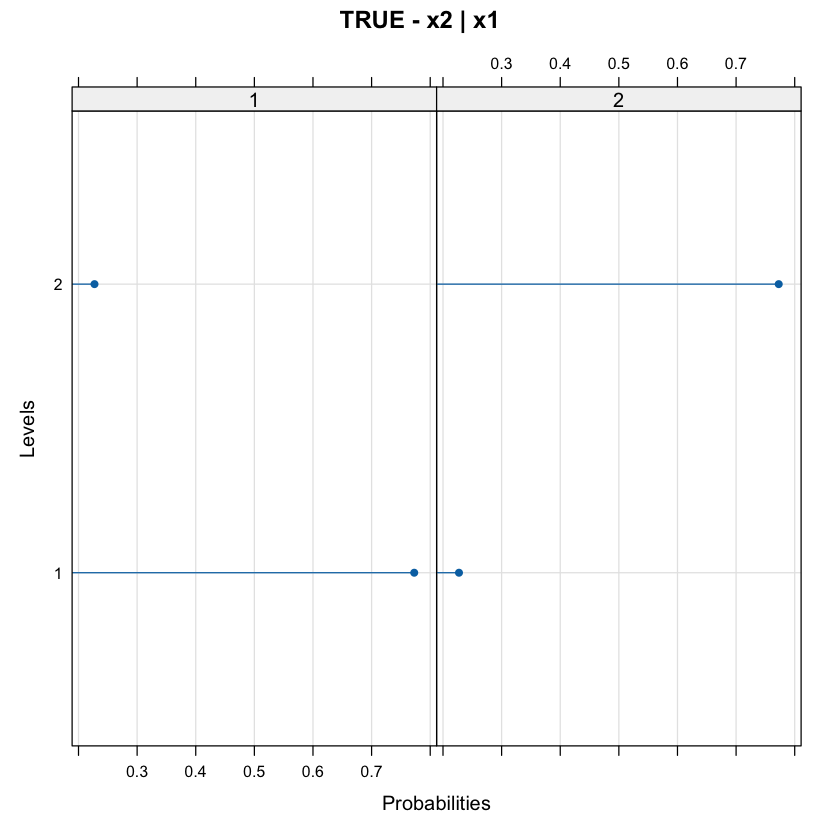

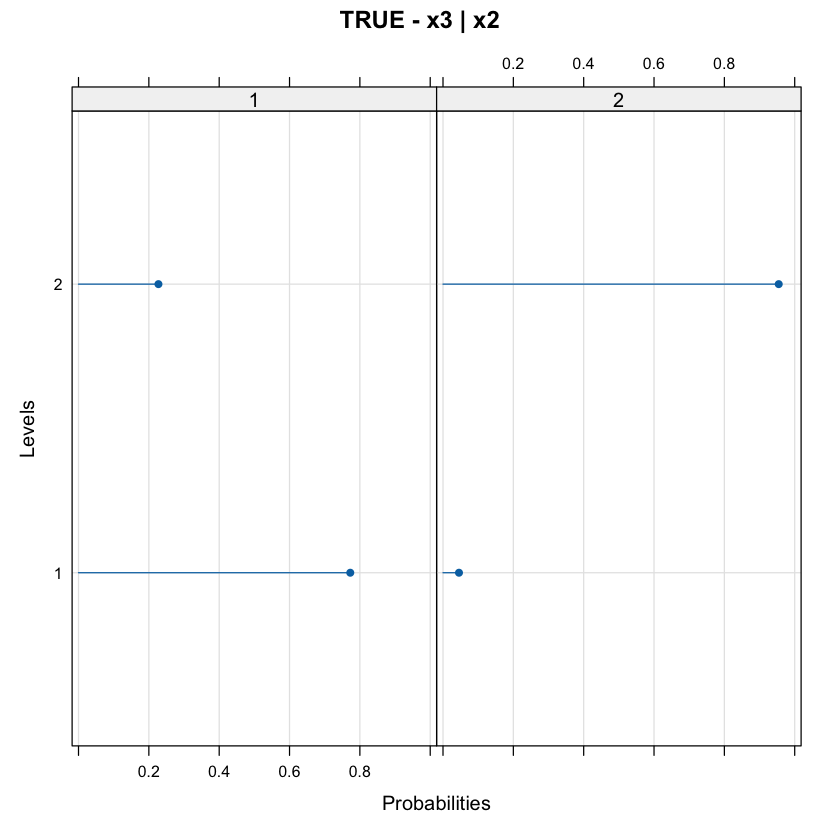

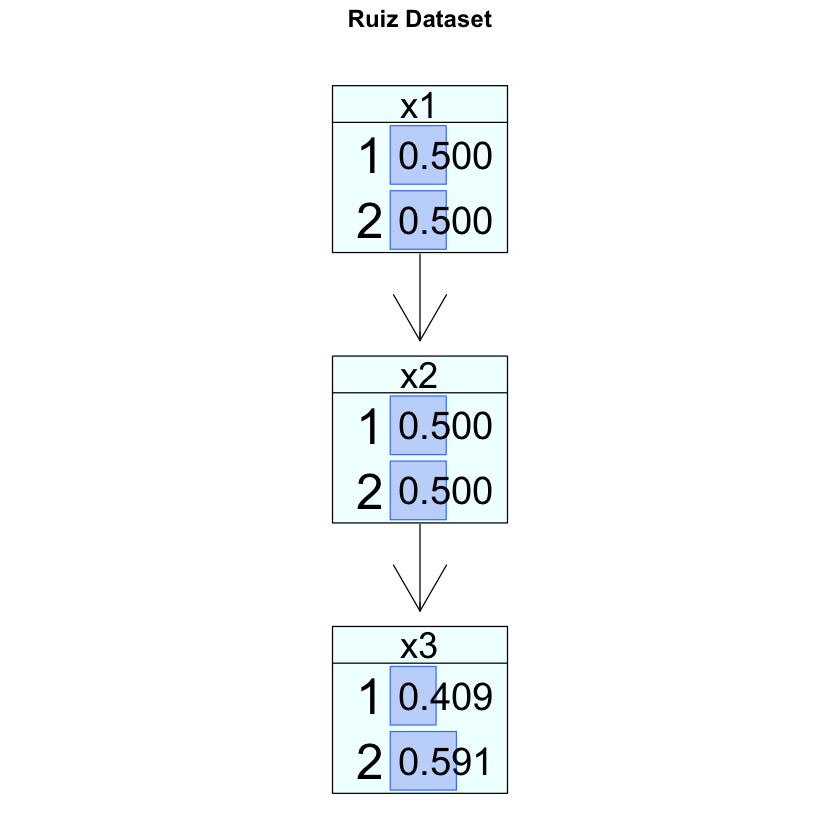

In [78]:
ruiz_df_fac

bn.fit.dotplot(
    ruiz.true.params$x2, 
    xlab = "Probabilities", ylab = "Levels", 
    main="TRUE - x2 | x1"
)

bn.fit.dotplot(
    ruiz.true.params$x3, 
    xlab = "Probabilities", ylab = "Levels", 
    main="TRUE - x3 | x2"
)

graphviz.chart(
    ruiz.true.params, 
    type = "barprob", layout = "dot", 
    draw.labels = TRUE, grid = FALSE, scale = c(1.5, 1.5), 
    col = "black", bg = "azure", text.col = "black", bar.col = "#115de9", 
    main = "Ruiz Dataset"
)

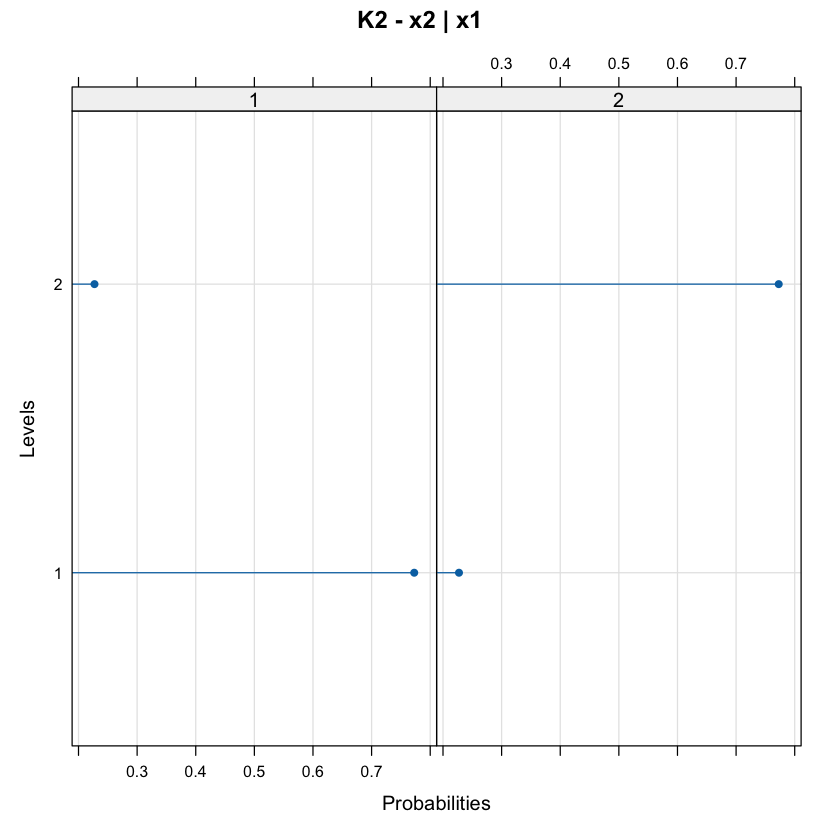

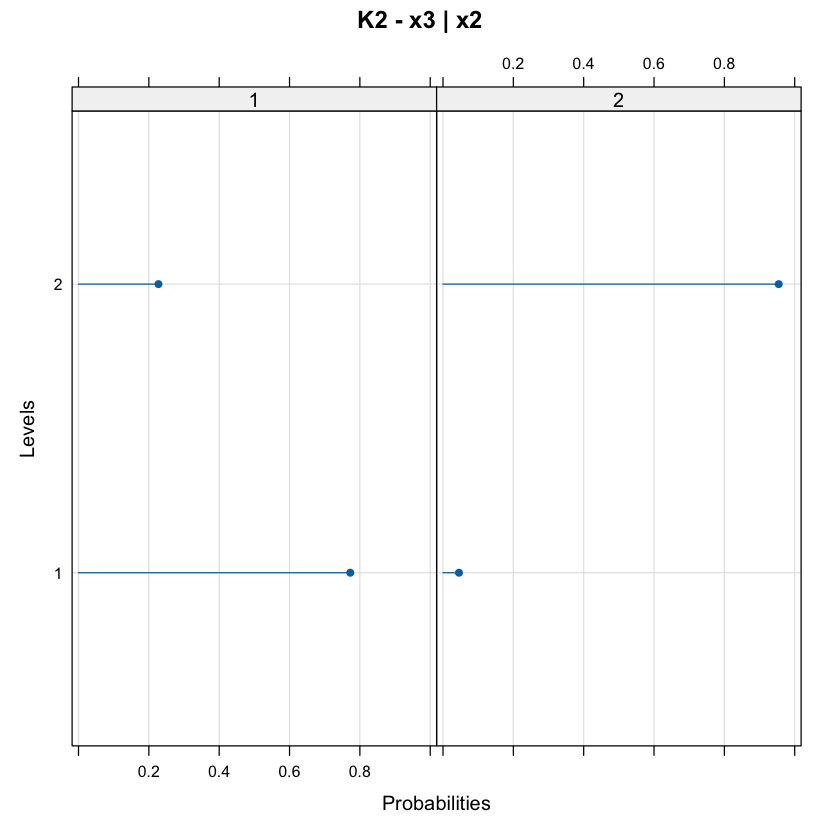

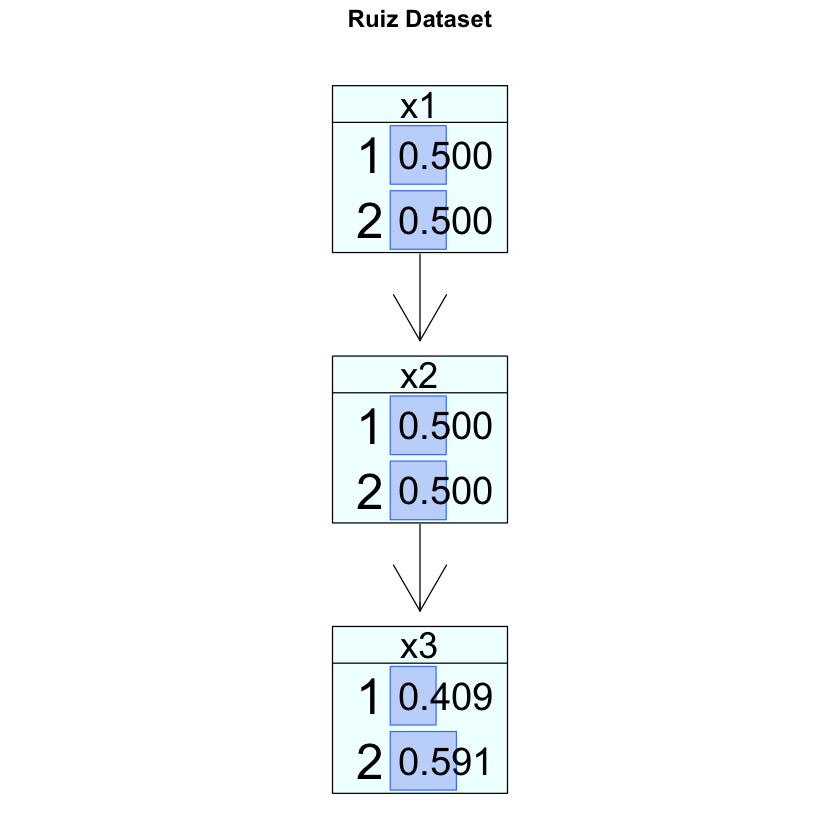

In [79]:
ruiz.k2.params <- bn.fit(
    x=ruiz_net$dag,
    data=ruiz_df_fac,
    method="bayes"
)

bn.fit.dotplot(
    ruiz.k2.params$x2, 
    xlab = "Probabilities", ylab = "Levels", 
    main="K2 - x2 | x1"
)

bn.fit.dotplot(
    ruiz.k2.params$x3, 
    xlab = "Probabilities", ylab = "Levels", 
    main="K2 - x3 | x2"
)

graphviz.chart(
    ruiz.k2.params, 
    type = "barprob", layout = "dot", 
    draw.labels = TRUE, grid = FALSE, scale = c(1.5, 1.5), 
    col = "black", bg = "azure", text.col = "black", bar.col = "#115de9", 
    main = "Ruiz Dataset"
)

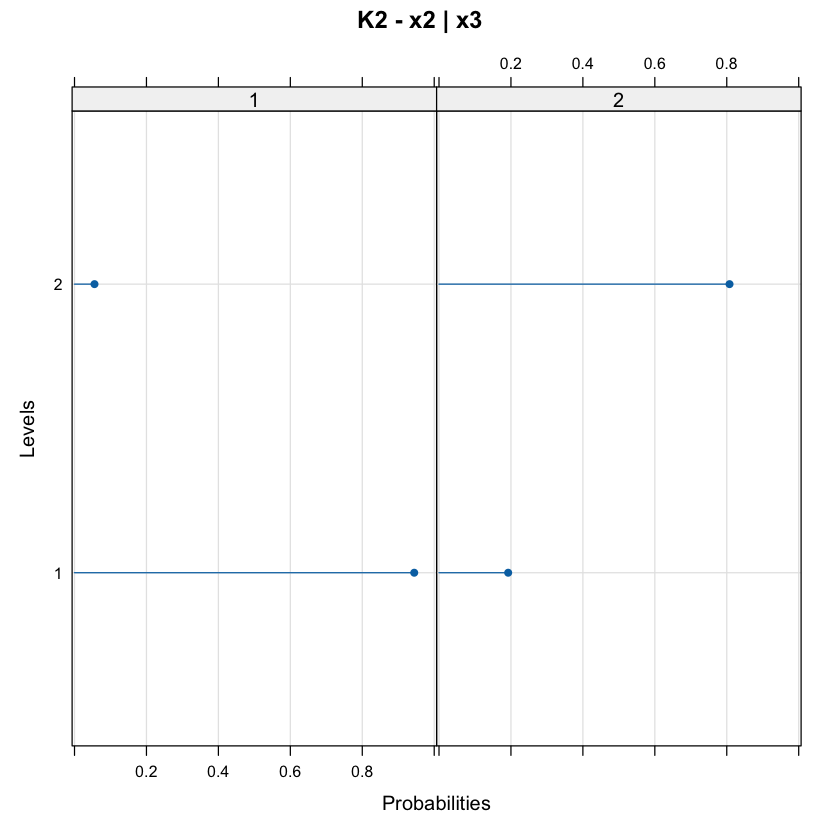

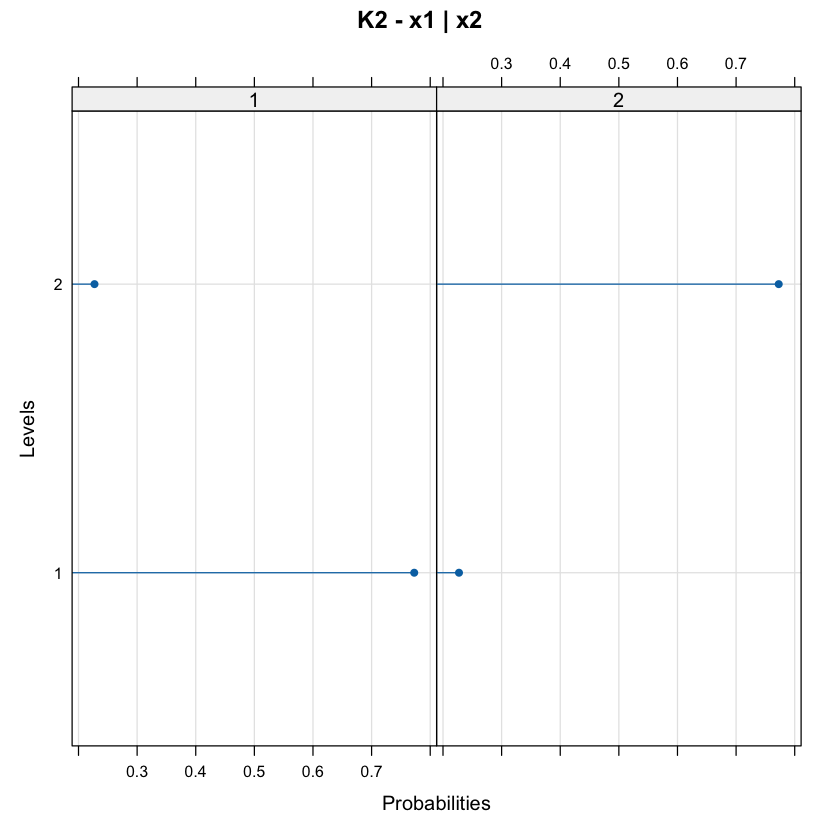

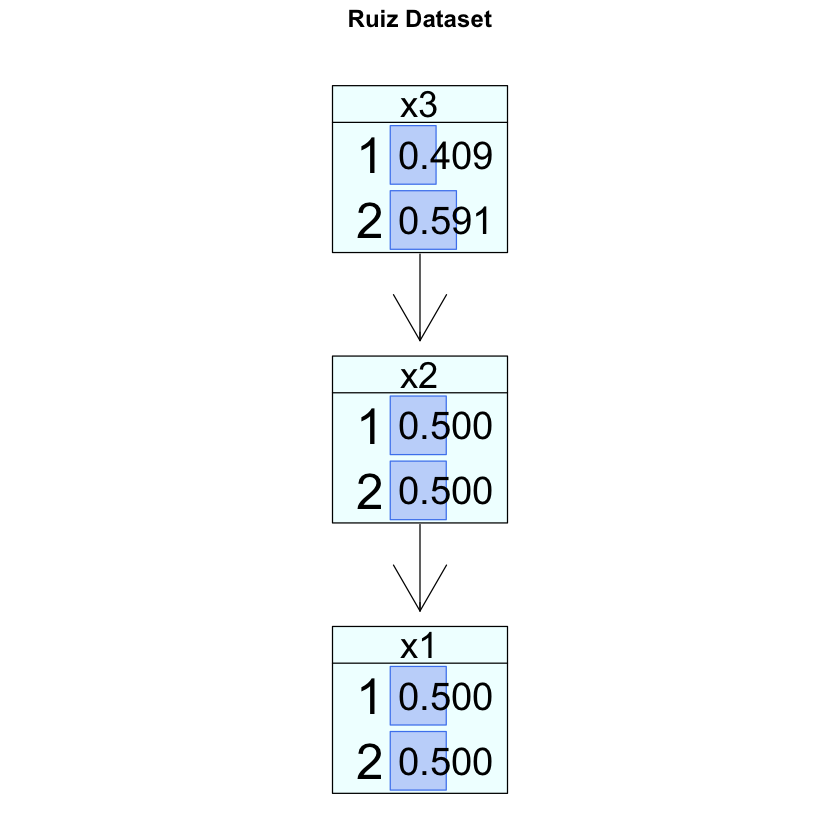

In [80]:
ruiz.mmhc.params <- bn.fit(
    x=ruiz_bs_bn,
    data=ruiz_df_fac,
    method="bayes"
)

bn.fit.dotplot(
    ruiz.mmhc.params$x2, 
    xlab = "Probabilities", ylab = "Levels", 
    main="K2 - x2 | x3"
)

bn.fit.dotplot(
    ruiz.mmhc.params$x1, 
    xlab = "Probabilities", ylab = "Levels", 
    main="K2 - x1 | x2"
)

graphviz.chart(
    ruiz.mmhc.params, 
    type = "barprob", layout = "dot", 
    draw.labels = TRUE, grid = FALSE, scale = c(1.5, 1.5), 
    col = "black", bg = "azure", text.col = "black", bar.col = "#115de9", 
    main = "Ruiz Dataset"
)

Warning message in arrows(head_from[1], head_from[2], head_to[1], head_to[2], col = edgeColor, :
"zero-length arrow is of indeterminate angle and so skipped"
Warning message in doTryCatch(return(expr), name, parentenv, handler):
"zero-length arrow is of indeterminate angle and so skipped"


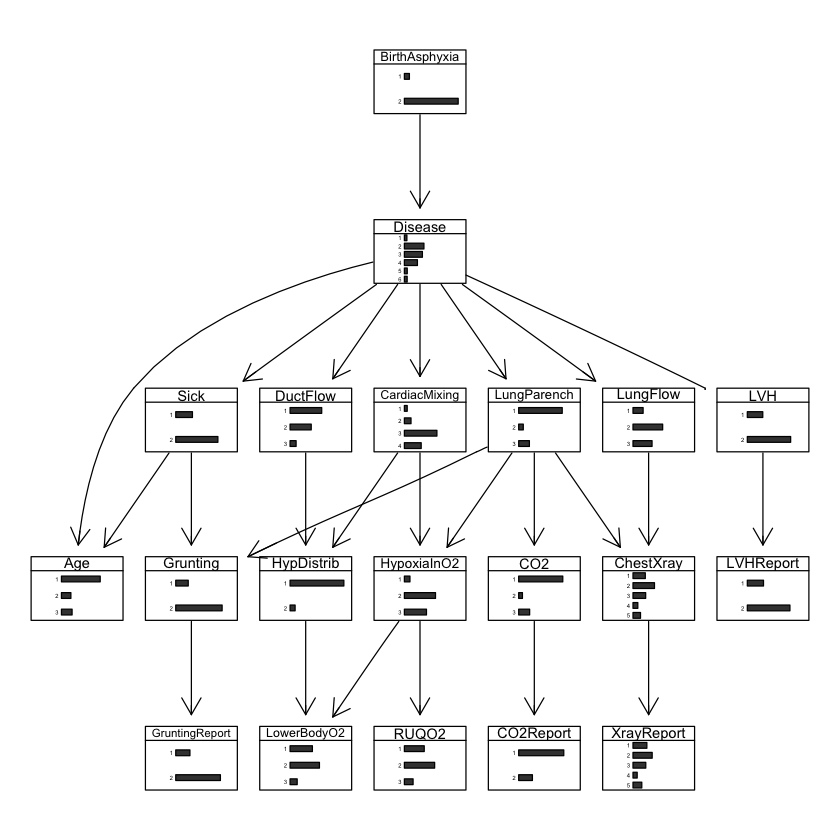

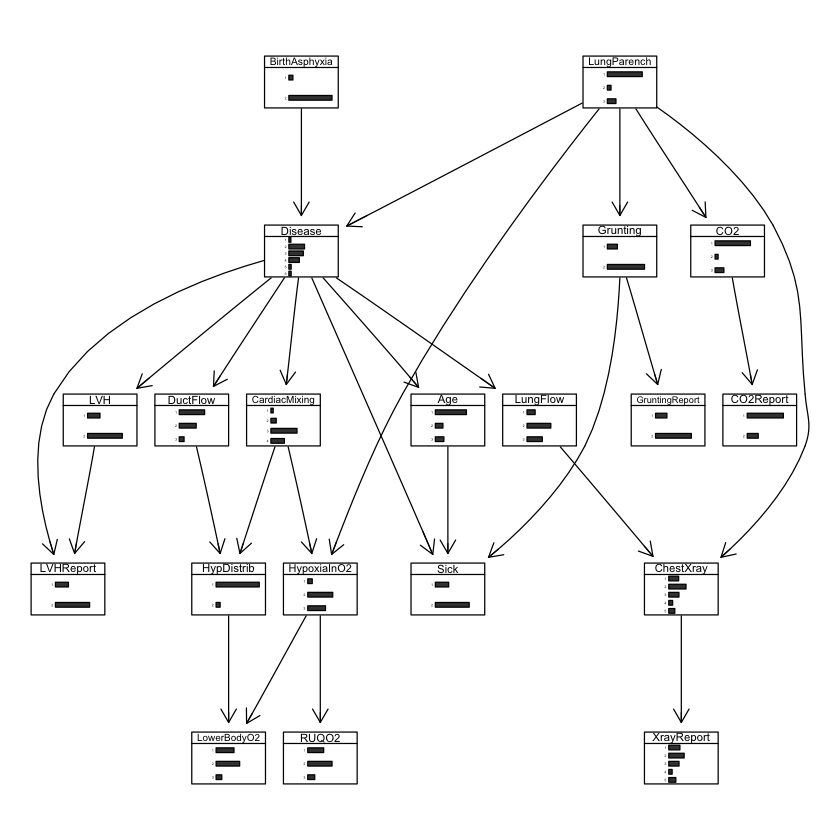

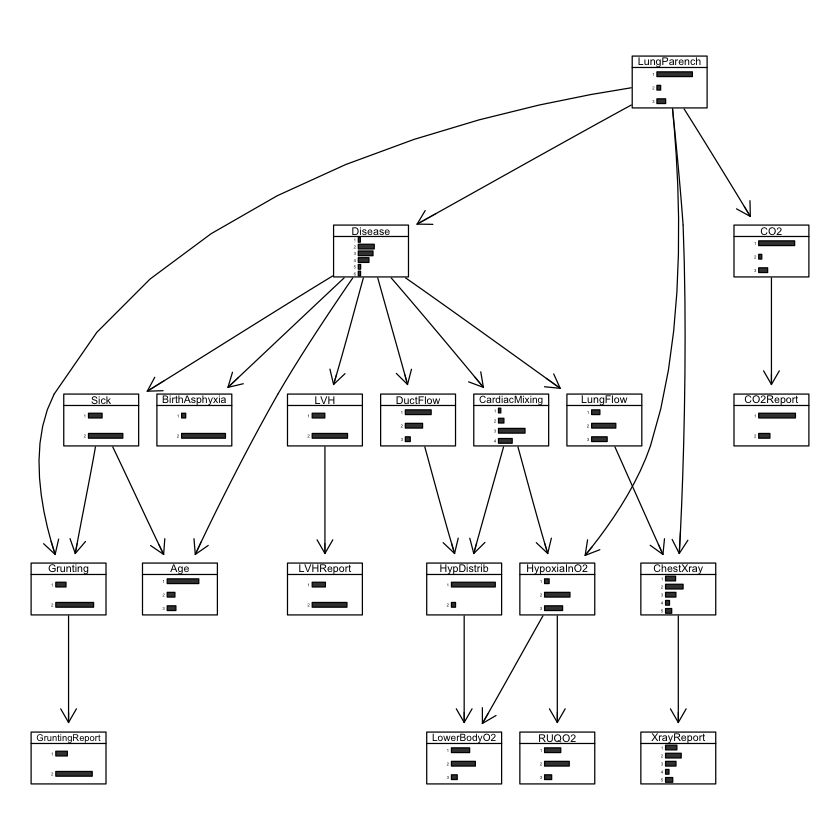

In [81]:
unloadNamespace("bnstruct")
library(bnlearn)
child.true.params <- bn.fit(
    x=child.true.dag.aligned,
    data=child_df_fac,
    method="bayes")
child.k2.params <- bn.fit(
    x=child_net$dag,
    data=child_df_fac,
    method="bayes")
child.mmhc.params <- bn.fit(
    x=child_bs_bn,
    data=child_df_fac,
    method="bayes")
bnlearn::graphviz.chart(
    child.true.params
)
bnlearn::graphviz.chart(
    child.k2.params
)
bnlearn::graphviz.chart(
    child.mmhc.params
)

### Plots

#### Ruiz

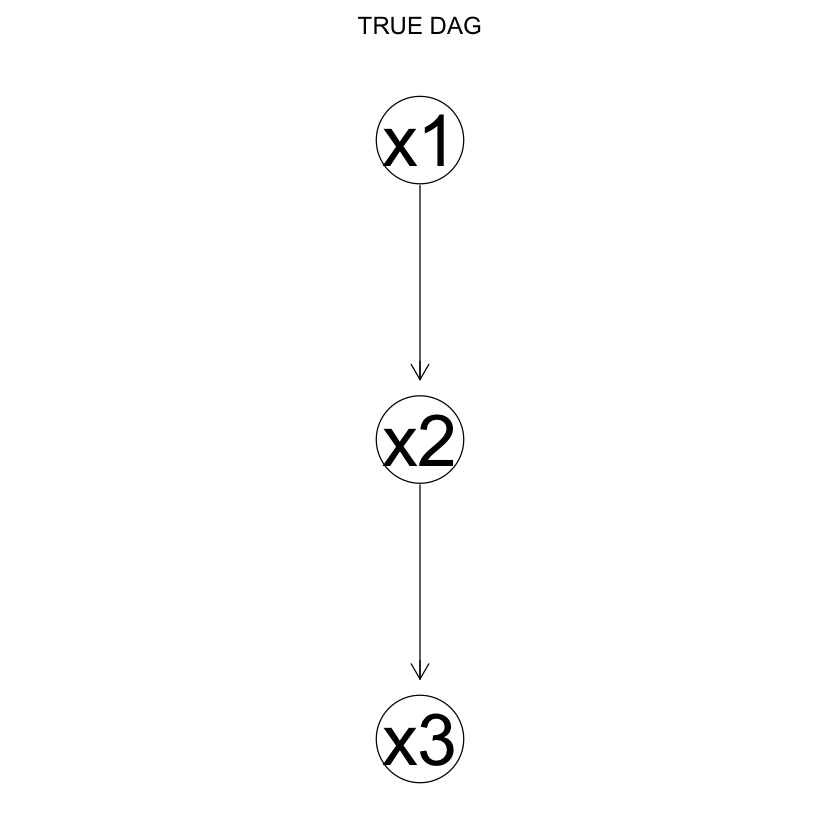

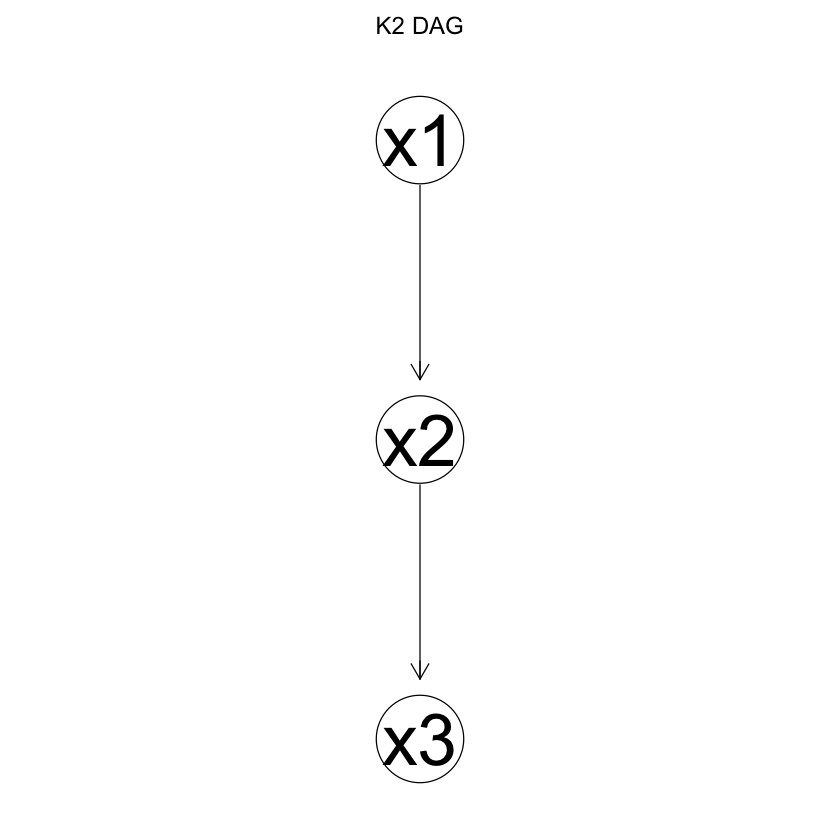

In [82]:
######## K2 ########
graphviz.compare(ruiz.true.dag, ruiz_net$dag, layout="dot", shape="circle", main = c("TRUE DAG", "K2 DAG"))

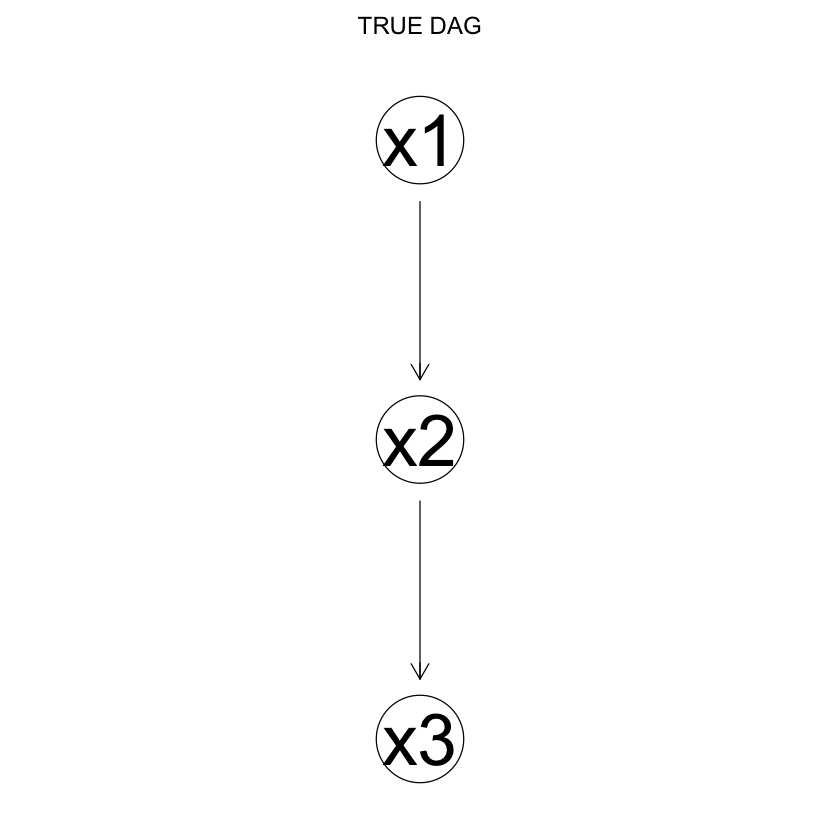

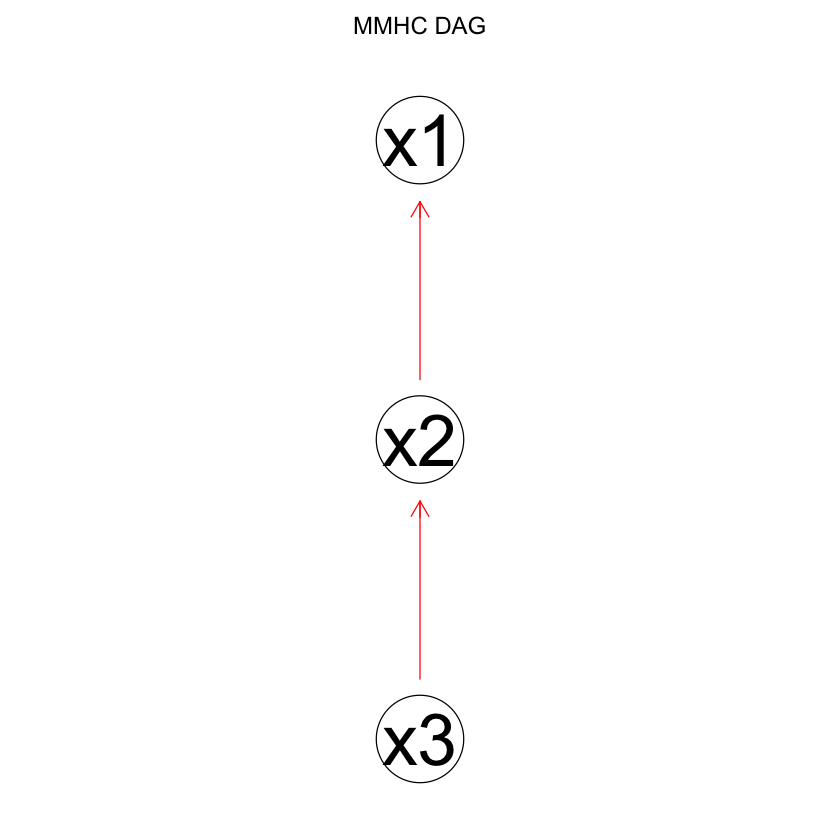

In [83]:
######## bnstruct ########
graphviz.compare(ruiz.true.dag, ruiz_bs_bn, shape="circle", main = c("TRUE DAG", "MMHC DAG"))

#### Asia

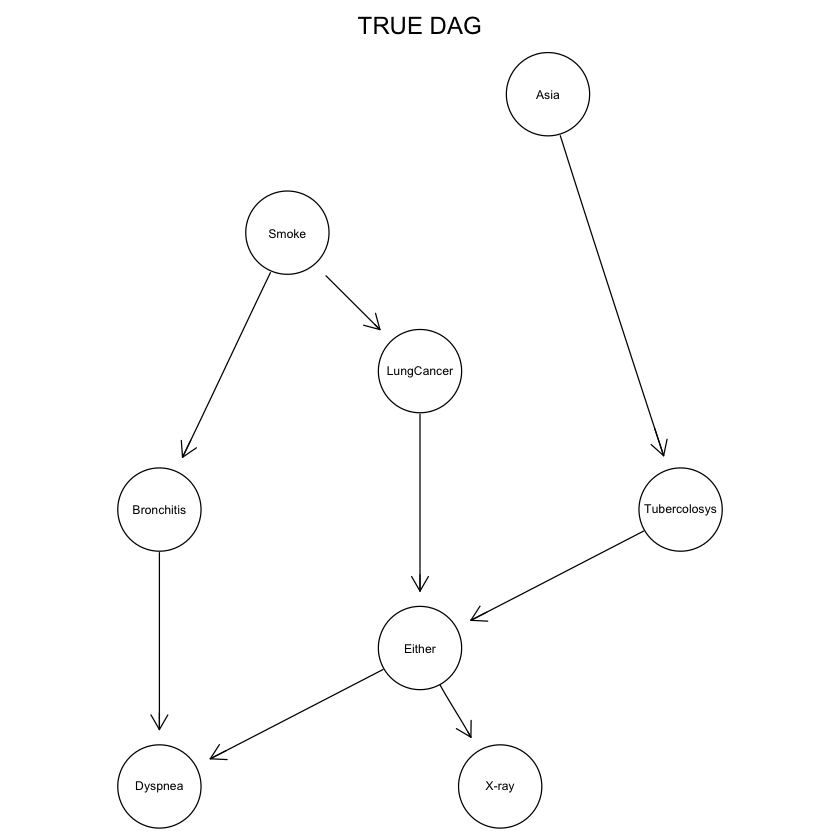

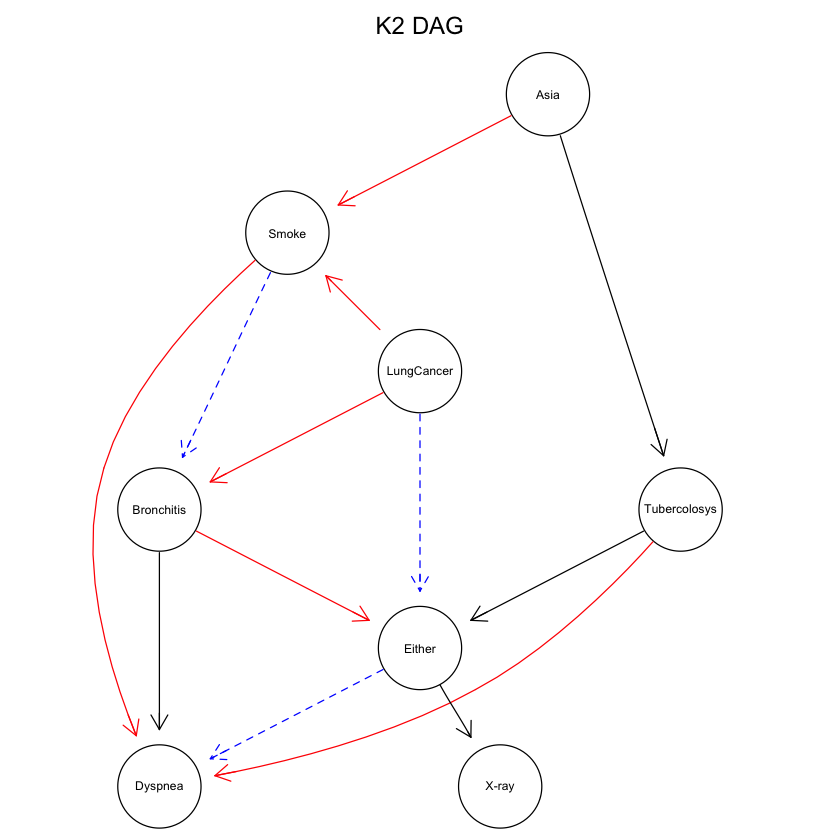

In [84]:
### K2 ####
graphviz.compare(asia.true.dag.aligned, asia_net$dag, layout="dot", shape="circle", main = c("TRUE DAG", "K2 DAG"))

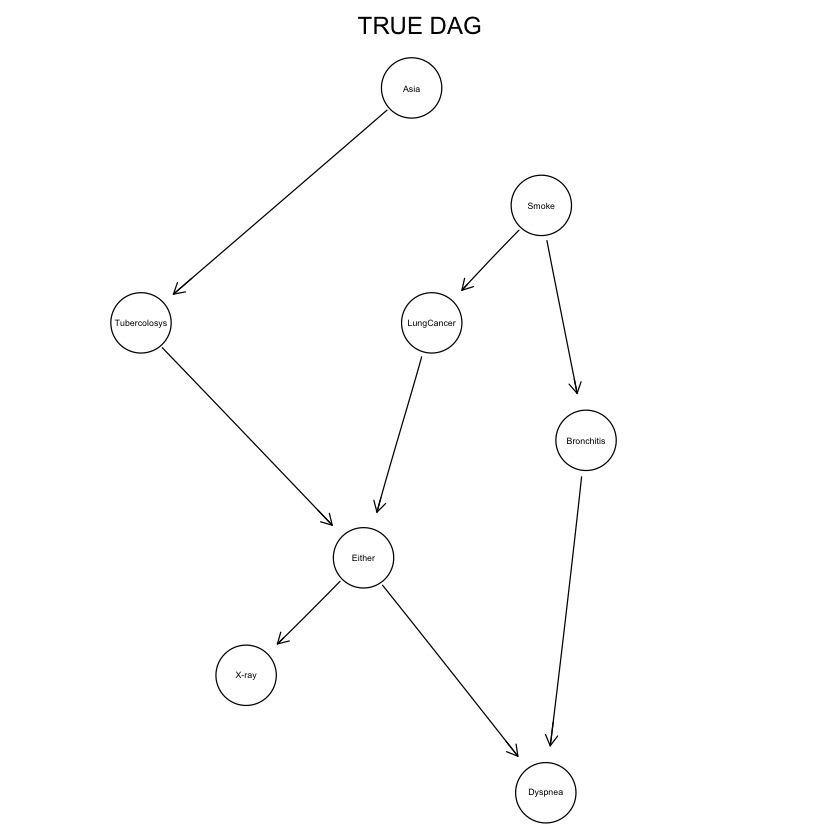

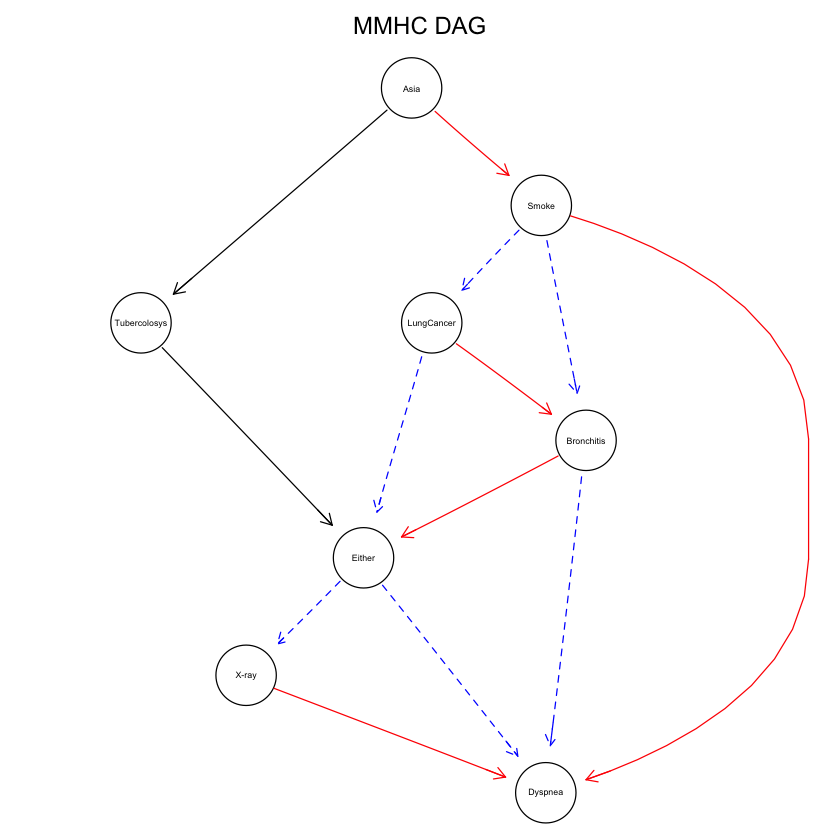

In [85]:
### bnstruct ####
graphviz.compare(asia.true.dag.aligned, asia_bs_bn, shape="circle", main = c("TRUE DAG", "MMHC DAG"))

#### Child

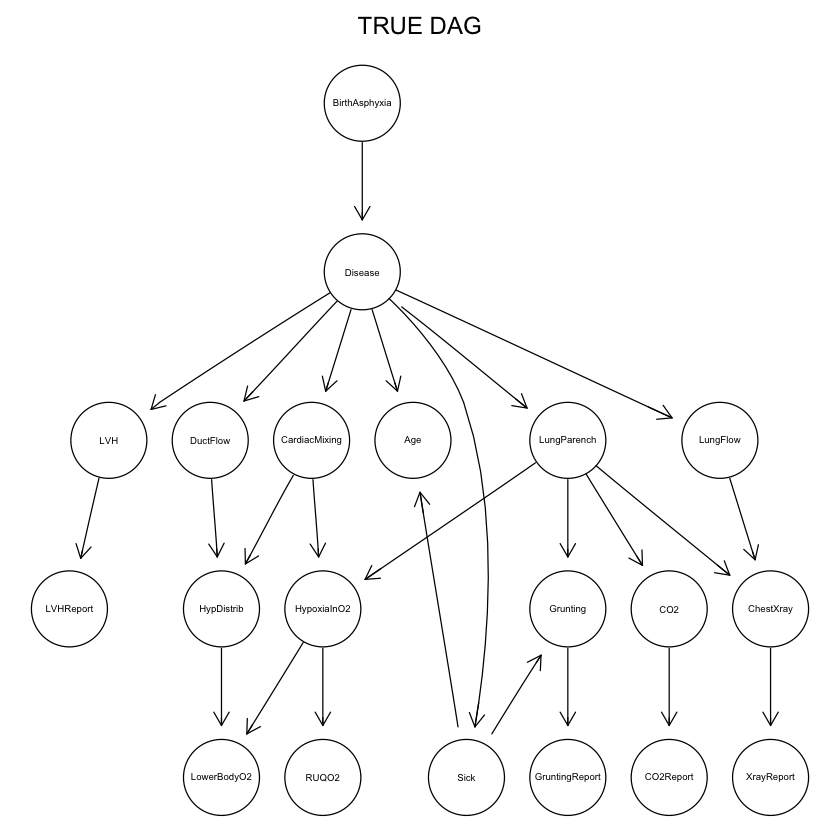

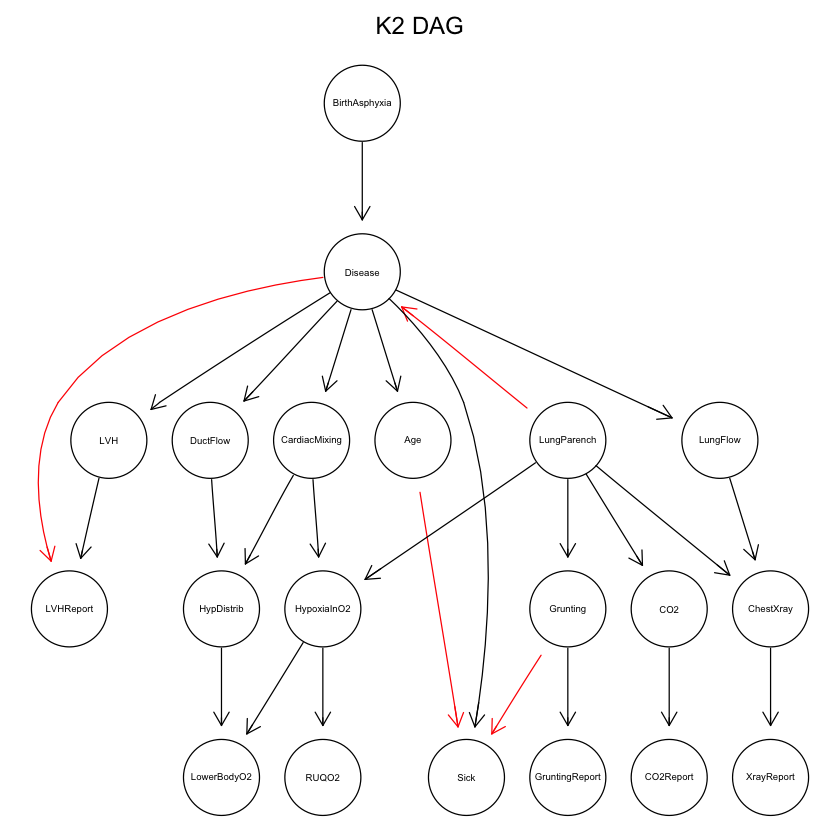

In [86]:
##### K2 #####
graphviz.compare(child.true.dag.aligned, child_net$dag, layout= "dot", shape="circle", main = c("TRUE DAG", "K2 DAG"))

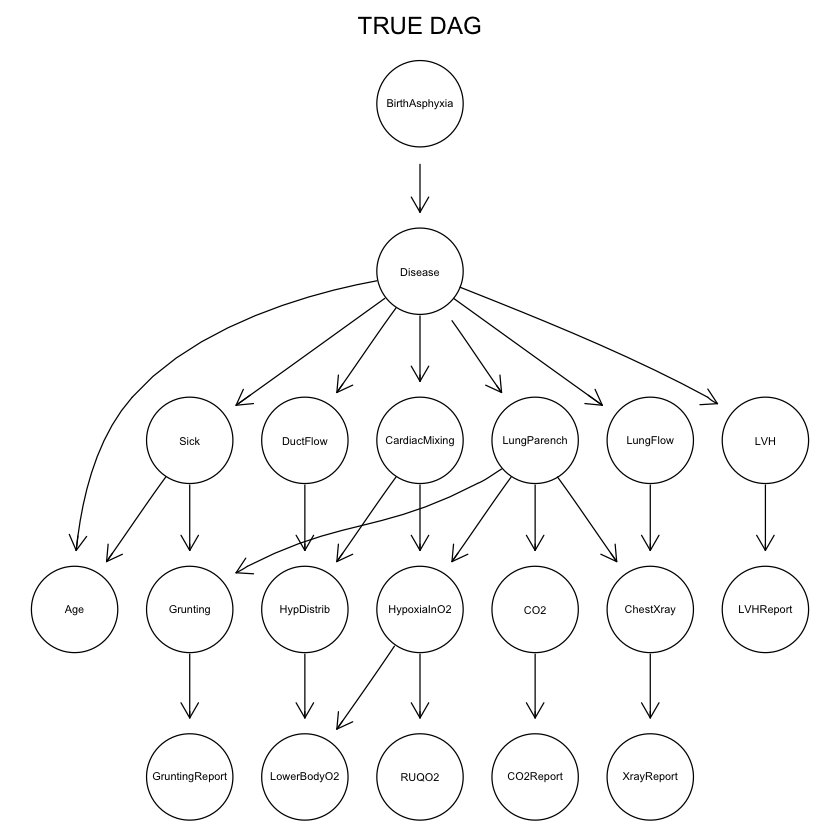

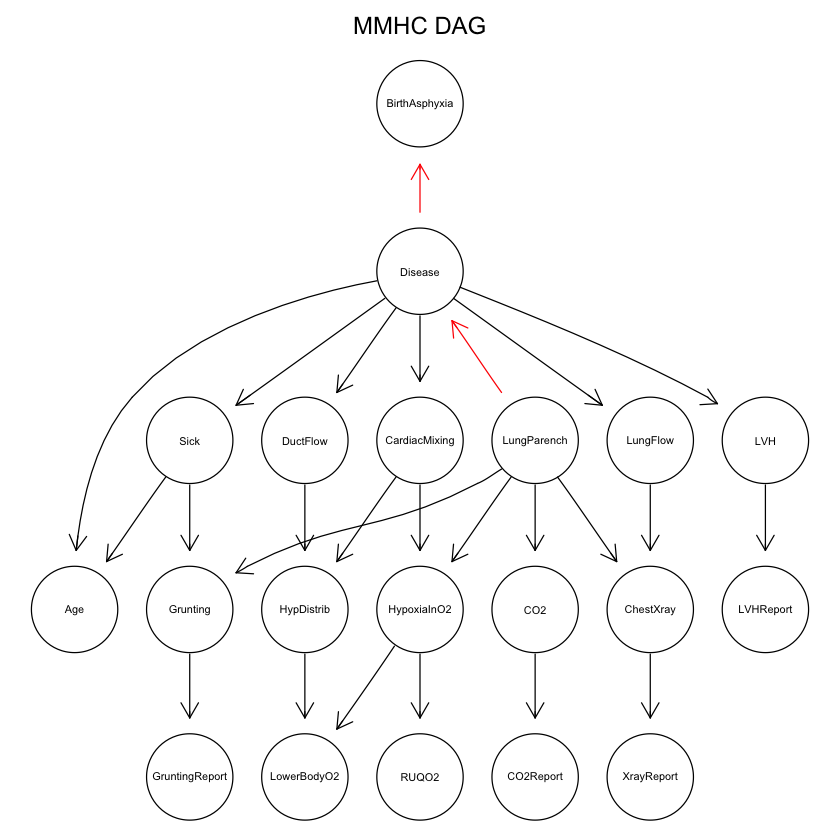

In [87]:
##### bnstruct #####
graphviz.compare(child.true.dag.aligned, child_bs_bn, layout="dot", shape="circle", main = c("TRUE DAG", "MMHC DAG"))

#### SACHS

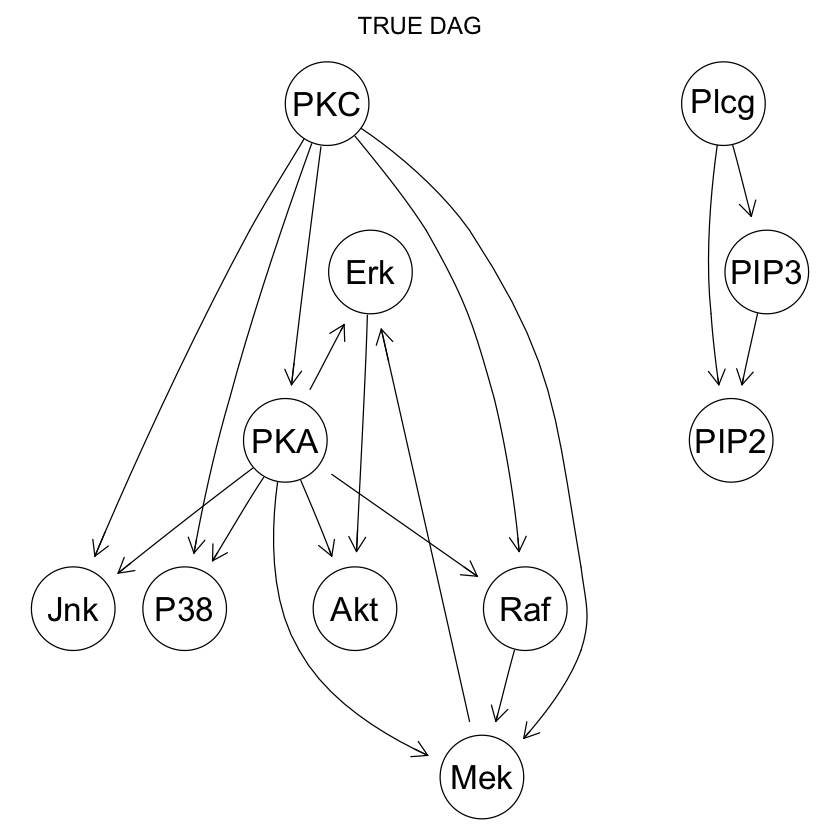

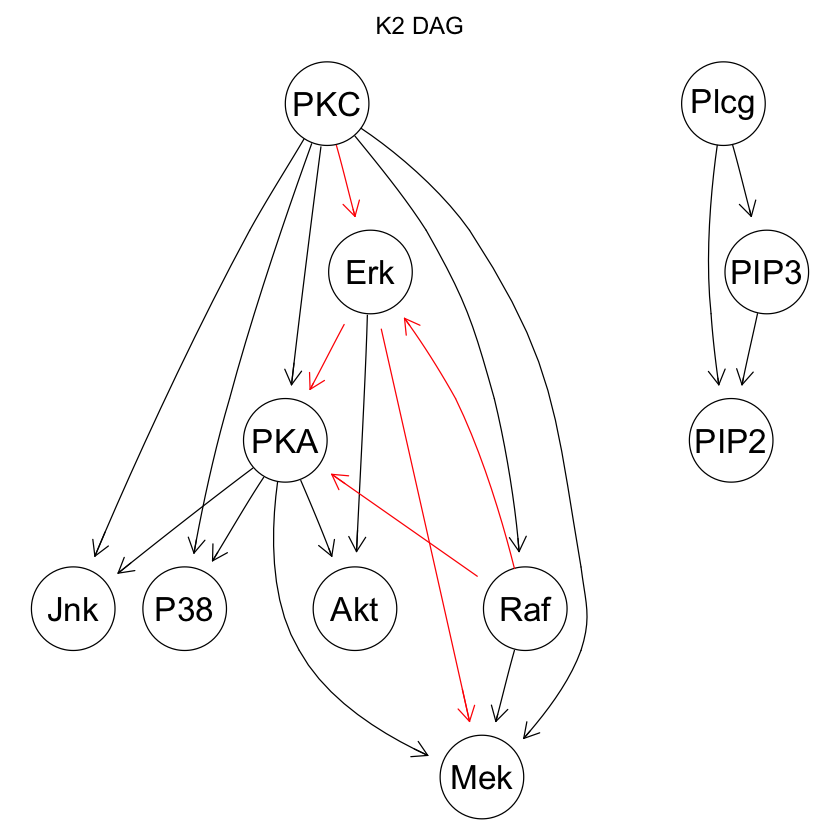

In [88]:
graphviz.compare(sachs.true.dag, sachs_net$dag, layout="dot", shape="circle", main = c("TRUE DAG", "K2 DAG"))

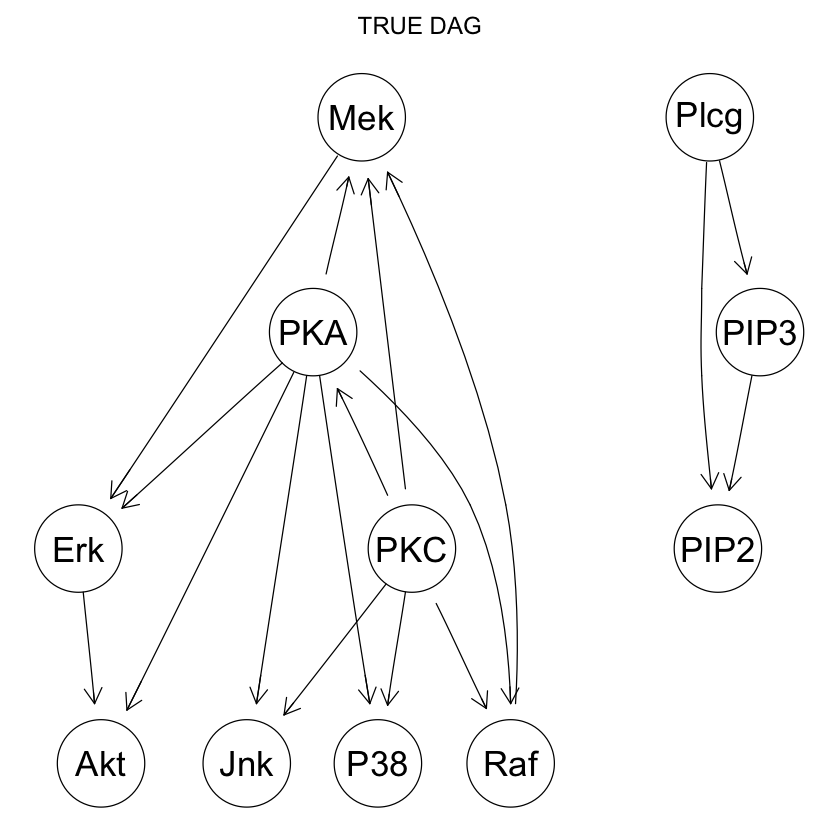

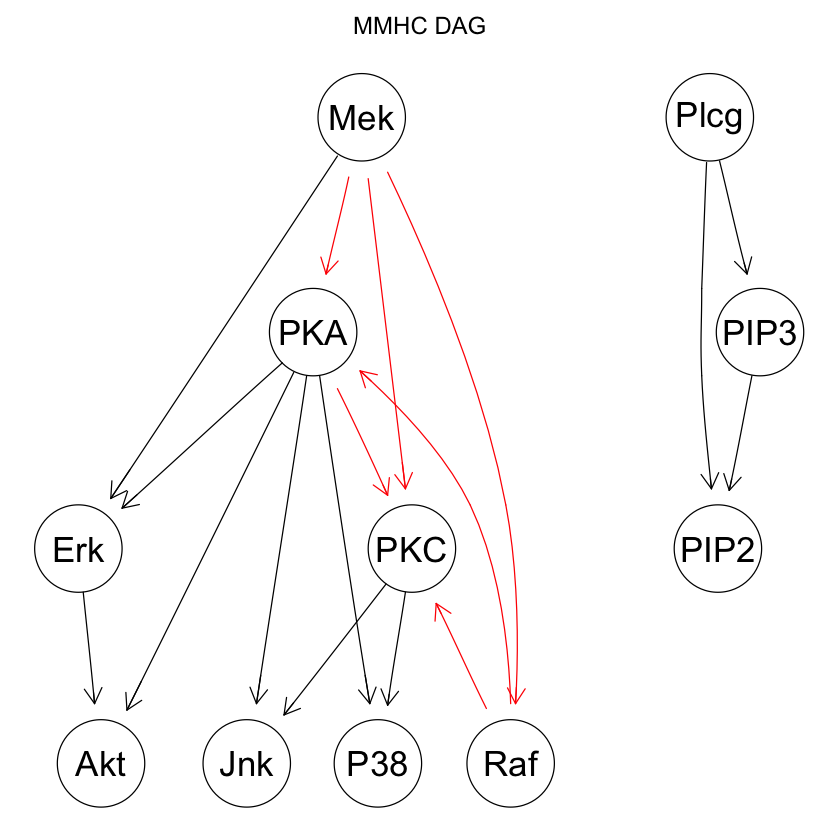

In [89]:
graphviz.compare(sachs.true.dag, sachs_bs_bn, layout="dot", shape="circle", main = c("TRUE DAG", "MMHC DAG"))



### Metrics

#### Scores

In [90]:
iss <- 10
bdeu.ruiz.true <- score(ruiz.true.dag, ruiz_df_fac, type = "bde", iss = iss)
bdeu.ruiz.k2 <- score(ruiz_net$dag, ruiz_df_fac, type = "bde", iss = iss)
bdeu.ruiz.bs <- score(ruiz_bs_bn, ruiz_df_fac, type = "bde", iss = iss)

data.frame("Score-BDeu" = c(bdeu.ruiz.true, bdeu.ruiz.k2, bdeu.ruiz.bs), row.names = c("True", "K2", "MMHC"))

,Score.BDeu
,<dbl>
True,-19.65341
K2,-19.65341
MMHC,-19.65341


In [91]:
bdeu.child.true <- score(child.true.dag.aligned, child_df_fac, type = "bde", iss = iss)
bdeu.child.k2 <- score(child_net$dag, child_df_fac, type = "bde", iss = iss)
bdeu.child.bs <- score(child_bs_bn, child_df_fac, type = "bde", iss = iss)

data.frame("Score-BDeu"=c(bdeu.child.true, bdeu.child.k2, bdeu.child.bs), row.names = c("True", "K2", "MMHC"))

,Score.BDeu
,<dbl>
True,-59676.08
K2,-59762.85
MMHC,-59676.08


In [92]:
bdeu.asia.true <- score(asia.true.dag.aligned, asia_df_fac, type = "bde", iss = iss)
bdeu.asia.k2 <- score(asia_net$dag, asia_df_fac, type = "bde", iss = iss)
bdeu.asia.bs <- score(asia_bs_bn, asia_df_fac, type = "bde", iss = iss)

data.frame("Score-BDeu" = c(bdeu.asia.true, bdeu.asia.k2, bdeu.asia.bs), row.names = c("True", "K2", "MMHC"))

,Score.BDeu
,<dbl>
True,-26093.91
K2,-22517.38
MMHC,-24244.45


In [93]:
bdeu.sachs.true <- score(sachs.true.dag, sachs_df_fac, type = "bic", iss = iss)
bdeu.sachs.k2 <- score(sachs_net$dag, sachs_df_fac, type = "bde", iss = iss)
bdeu.sachs.bs <- score(sachs_bs_bn, sachs_df_fac, type = "bde", iss = iss)

data.frame("Score-BDeu"=c(bdeu.sachs.true, bdeu.sachs.k2, bdeu.sachs.bs), row.names = c("True", "K2", "MMHC"))

Warning message in check.unused.args(extra.args, score.extra.args[[score]]):
"unused argument(s): 'iss'."


,Score.BDeu
,<dbl>
True,-72448.71
K2,-72362.69
MMHC,-72129.58


#### Structural Hamming Distance (SHD)
The Structural Hamming Distance between two DAGs $(G_1,G_2)$ is
$$
\mathrm{SHD}(G_1,G_2)=\bigl|{(i,j):A_1(i,j)\neq A_2(i,j)}\bigr|,
$$
that is the distance, between two adjacency matrices in terms of edges, between two network structures. The lower the shd, the more similar are the two network structures.

In [94]:
###### METRICS ######
shd_ruiz.k2  <- bnlearn::shd(ruiz_net$dag, ruiz.true.dag)
shd_ruiz.bs <- bnlearn::shd(ruiz_bs_bn, ruiz.true.dag)

shd_asia.k2  <- bnlearn::shd(asia_net$dag, asia.true.dag.aligned)
shd_asia.bs <- bnlearn::shd(asia_bs_bn, asia.true.dag.aligned)

shd_child.k2 <- bnlearn::shd(child_net$dag, child.true.dag.aligned)
shd_child.bs <- bnlearn::shd(child_bs_bn, child.true.dag.aligned)

shd_sachs.k2 <- bnlearn::shd(sachs_net$dag, sachs.true.dag)
shd_sachs.bs <- bnlearn::shd(sachs_bs_bn, sachs.true.dag)

results <- data.frame(
  Dataset = rep(c("Ruiz","Asia","Child","Sachs"), each = 2),
  Method  = rep(c("K2","MMHC"), times = 4),
  SHD     = c(
    shd_ruiz.k2,  shd_ruiz.bs,
    shd_asia.k2,  shd_asia.bs,
    shd_child.k2, shd_child.bs,
    shd_sachs.k2, shd_sachs.bs
  ),
  row.names = NULL
)
results

Dataset,Method,SHD
<chr>,<chr>,<int>
Ruiz,K2,0
Ruiz,MMHC,0
Asia,K2,9
Asia,MMHC,11
Child,K2,13
Child,MMHC,0
Sachs,K2,2
Sachs,MMHC,0


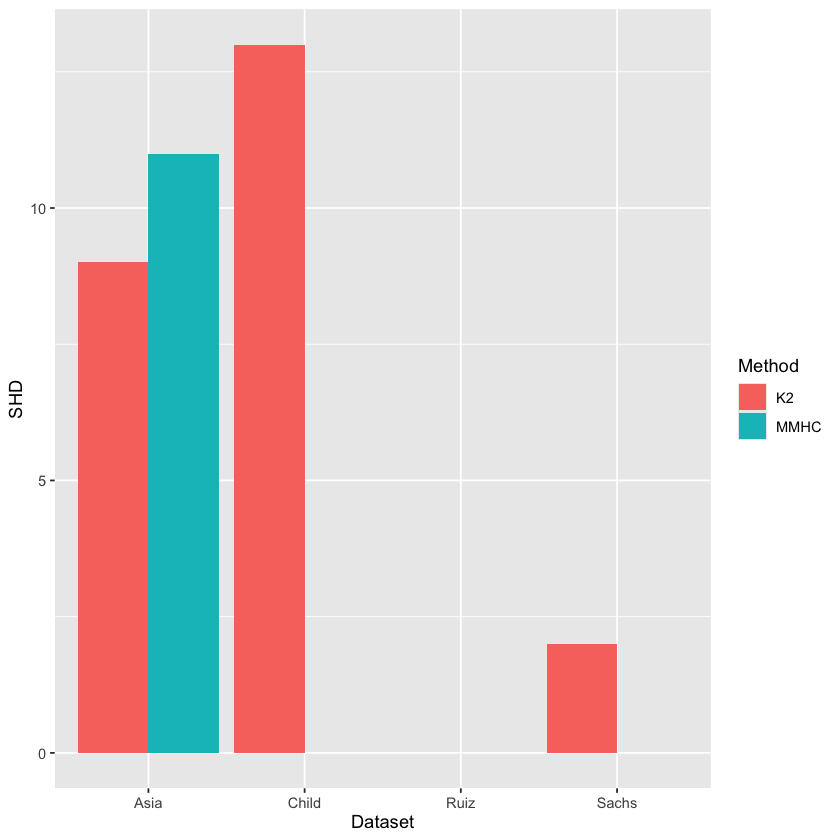

In [95]:
ggplot(results, aes(x = Dataset, y = SHD, fill = Method)) +
  geom_col(position="dodge")

#### Edge Counts & Precision/Recall

Let
$$
E_1,E_2
$$
be the arc‐sets.  Then:
$$
\text{TP} = |E_1\cap E_2|,\quad
\text{FP} = |E_2\setminus E_1|,\quad
\text{FN} = |E_1\setminus E_2|.
$$
+ Precision ($= \tfrac{TP}{TP+FP}$,)
+ Recall ($= \tfrac{TP}{TP+FN}$,)
+ F1 Score ($=2\frac{PR}{P+R}$).

In [96]:
##### PRECISION/RECALL STATS #####
pr_ruiz.k2  <- compare_stats(ruiz.true.dag,              ruiz_net$dag)
pr_ruiz.bs  <- compare_stats(ruiz.true.dag,              ruiz_bs_bn)

pr_asia.k2  <- compare_stats(asia.true.dag.aligned,      asia_net$dag)
pr_asia.bs  <- compare_stats(asia.true.dag.aligned,      asia_bs_bn)

pr_child.k2 <- compare_stats(child.true.dag.aligned,     child_net$dag)
pr_child.bs <- compare_stats(child.true.dag.aligned,     child_bs_bn)

pr_sachs.k2 <- compare_stats(sachs.true.dag,             sachs_net$dag)
pr_sachs.bs <- compare_stats(sachs.true.dag,             sachs_bs_bn)

pr_results <- rbind(
  cbind(Dataset = "Ruiz",  Method = "K2", pr_ruiz.k2),
  cbind(Dataset = "Ruiz",  Method = "MMHC", pr_ruiz.bs),
  cbind(Dataset = "Asia",  Method = "K2", pr_asia.k2),
  cbind(Dataset = "Asia",  Method = "MMHC", pr_asia.bs),
  cbind(Dataset = "Child", Method = "K2", pr_child.k2),
  cbind(Dataset = "Child", Method = "MMHC", pr_child.bs),
  cbind(Dataset = "Sachs", Method = "K2", pr_sachs.k2),
  cbind(Dataset = "Sachs", Method = "MMHC", pr_sachs.bs)
)

float_cols <- c("Precision","Recall","F1")
pr_results[float_cols] <- lapply(pr_results[float_cols], signif, 3)

pr_results


Dataset,Method,TP,FP,FN,Precision,Recall,F1
<chr>,<chr>,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>
Ruiz,K2,2,0,0,1.000,1.000,1.000
Ruiz,MMHC,0,2,2,0.000,0.000,NA
Asia,K2,4,6,4,0.400,0.500,0.444
Asia,MMHC,2,5,6,0.286,0.250,0.267
Child,K2,22,4,3,0.846,0.880,0.863
Child,MMHC,23,2,2,0.920,0.920,0.920
Sachs,K2,14,5,3,0.737,0.824,0.778
Sachs,MMHC,11,6,6,0.647,0.647,0.647
